In [1]:
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
from federated_learning.helper import utils
from federated_learning.FLNet import FLNet
from federated_learning.Arguments import Arguments
import torch, random
from collections import defaultdict
import copy
from torchvision import transforms
from federated_learning.FLCustomDataset import FLCustomDataset
import coloredlogs, logging
CONFIG_PATH = '../configs/defaults.yml'
logger = logging.getLogger(__name__)
coloredlogs.install(level='DEBUG')

In [2]:
workers_idx = ["worker_" + str(i) for i in range(50)]
attackers_idx = utils.get_workers_idx(workers_idx, 30, [])
mapped_ds_itr = utils.map_shards_to_worker(
            utils.split_randomly_dataset(
                utils.sort_mnist_dataset(
                    utils.fraction_of_datasets(
                        {"total": utils.load_mnist_dataset(
                            train=True, 
                            transform=transforms.Compose([transforms.ToTensor(),]))},
                        0.3, [])
                ),
                50),
            workers_idx, 
            1)
mapped_datasets = dict()
for mapped_ds in mapped_ds_itr:
    for ww_id, dataset in mapped_ds.items():
        if ww_id in attackers_idx:
            mapped_datasets.update(
                {ww_id: FLCustomDataset(
                    utils.attack_shuffle_pixels(dataset.data),
                    dataset.targets,
                    transform=transforms.Compose([
                        transforms.ToTensor()])
                )}
            )
        else:
            mapped_datasets.update(mapped_ds)

2021-02-25 18:54:17 agent-4 root[3474730] INFO Loading MNIST [train: True] dataset...
2021-02-25 18:54:17 agent-4 root[3474730] INFO Extracting 30.0% of users data (total: 18000) to be sent to the server...
2021-02-25 18:54:17 agent-4 root[3474730] INFO Extracted... Ok, The size of the extracted data: torch.Size([18000, 28, 28])
2021-02-25 18:54:17 agent-4 root[3474730] INFO Sorting the MNIST dataset based on labels...
2021-02-25 18:54:18 agent-4 root[3474730] INFO Splitting the dataset into 50 groups, each with 360 samples...


In [5]:
def draw_imgs(data_np, targets_np):
    figure = plt.figure(figsize=(8,8))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.axis("off")
        plt.title(targets_np[i])
        plt.imshow(data_np[i], cmap='gray')

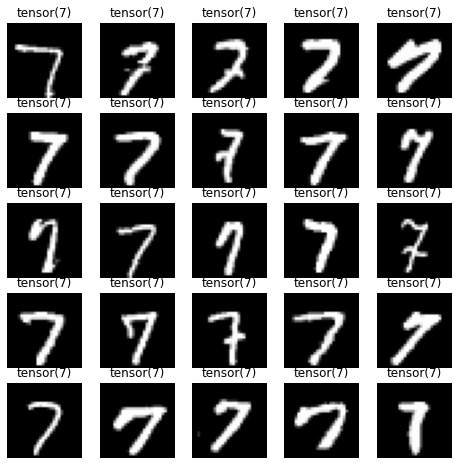

In [7]:
draw_imgs(mapped_datasets['worker_1'].data, mapped_datasets['worker_1'].targets)

In [ ]:
# import neptune
# token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNmRhYmZmM2YtZDc5Yi00ZGMyLWE5MWEtMjVkMDEwOGNjYTliIn0="
# neptune.init(project_qualified_name="ehsan/sandbox", api_token=token)
# neptune.create_experiment(name="Results Evaluation")
# neptune.append_tag("EHSAN ETESAMI")
# neptune.stop()

In [ ]:
print(dd.data[0])

In [ ]:
configs = utils.load_config(CONFIG_PATH)
args = Arguments(
        shards_num=configs['mnist']['shards_num'],
        shards_per_worker_num=configs['mnist']['shards_per_worker_num'],
        total_users_num=configs['mnist']['total_users_num'],
        log_level="DEBUG",
        log_format='%(asctime)s: %(message)s'
    )
workers_idx = ["worker_" + str(i) for i in range(args.total_users_num)]
logger = logging.getLogger(__name__)
coloredlogs.install(level=args.log_level, fmt=args.log_format)

In [ ]:
mapped_datasets = dict()

mapped_ds_itr = utils.map_shards_to_worker(
    utils.split_randomly_dataset(
        utils.load_mnist_dataset(
            train=True, 
            transform=transforms.Compose([transforms.ToTensor(),])),
        args.shards_num),
    workers_idx, 
    args.shards_per_worker_num)

for mapped_ds in mapped_ds_itr:
    for ww_id, dataset in mapped_ds.items():
        mapped_datasets.update(mapped_ds)

In [ ]:
mapped_datasets

In [ ]:
mapped_datasets = dict()

mapped_ds_itr = utils.map_shards_to_worker(
    utils.split_randomly_dataset(
        utils.load_mnist_dataset(
            train=True, 
            transform=transforms.Compose([transforms.ToTensor(),])),
        args.shards_num),
    workers_idx, 
    args.shards_per_worker_num)

for mapped_ds in mapped_ds_itr:
    mapped_datasets.update(mapped_ds)

In [ ]:
mapped_datasets

In [ ]:
import torch
import numpy as np

In [ ]:
aa = torch.rand((5, 3, 3))

In [ ]:
cc = np.random.uniform(0, 4, (5,3,3))

In [ ]:
bb = [0,2,4]
gg = aa[bb]
kk = (aa[bb] + cc[bb]).byte()

In [ ]:
print(gg.type())
print(kk.type())

In [ ]:
gg

In [ ]:
kk

In [ ]:
aa = torch.tensor([1,2,3,4,5,6,7,8,9])
bb = [1,4,2,7]

print(aa[bb])
print()
print(aa[bb] + np.random.uniform(0, 4, (4,5,5)))

In [ ]:
aa

In [ ]:
def test1(parameter, **args):
    print(parameter)
    print(args.items())
    for ii, jj in args.items():
        print(ii, jj)

In [ ]:
def test2(parameter, *args):
    print(parameter)
    print(args)

In [ ]:
test1("ehsan", **args)

In [ ]:
test2("ehsan", ['ehsan','etesami', 1234])

In [ ]:
import matplotlib.pyplot as plt
def draw_samples(data):
    list_keys = list(data.keys())
    data_np = dict()
    data_np['x'] = np.array(data[list_keys[0]]['x'], dtype = np.float32).reshape(-1, 28, 28)
    data_np['y'] = np.array(data[list_keys[0]]['y'], dtype = np.int64).reshape(-1, 1)
    figure = plt.figure(figsize=(8,8))
    for i in range(36):
        plt.subplot(6, 6, i + 1)
        plt.axis("off")
        plt.title(data_np['y'][i])
        plt.imshow(data_np['x'][i], cmap='gray')
        
draw_samples(raw_test_data)